# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
#1
"""
Your code here
"""
print("Max value of CNT_CHILDREN: %s" % app_train['CNT_CHILDREN'].max())
cut_rule = [0,1,3,6,20]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True, right=False, labels=['0', '1-2', '3-4', '5-19'])
app_train['CNT_CHILDREN_GROUP'].value_counts()
print(app_train['CNT_CHILDREN_GROUP'])

Max value of CNT_CHILDREN: 19
0           0
1           0
2           0
3           0
4           0
5           0
6         1-2
7           0
8           0
9           0
10        1-2
11          0
12          0
13        1-2
14          0
15          0
16          0
17        1-2
18          0
19        1-2
20          0
21        1-2
22        1-2
23          0
24        1-2
25          0
26          0
27        1-2
28          0
29          0
         ... 
307481      0
307482      0
307483      0
307484      0
307485    1-2
307486    1-2
307487      0
307488      0
307489      0
307490      0
307491    1-2
307492      0
307493      0
307494    1-2
307495      0
307496      0
307497      0
307498      0
307499      0
307500      0
307501    3-4
307502    1-2
307503      0
307504      0
307505      0
307506      0
307507      0
307508      0
307509      0
307510      0
Name: CNT_CHILDREN_GROUP, Length: 307511, dtype: category
Categories (4, object): [0 < 1-2 < 3-4 < 5-19]


In [5]:
#2-1
"""
Your code here
"""
grp = app_train['CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP
0       166288.713566
1-2     174725.712648
3-4     173626.303191
5-19    147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

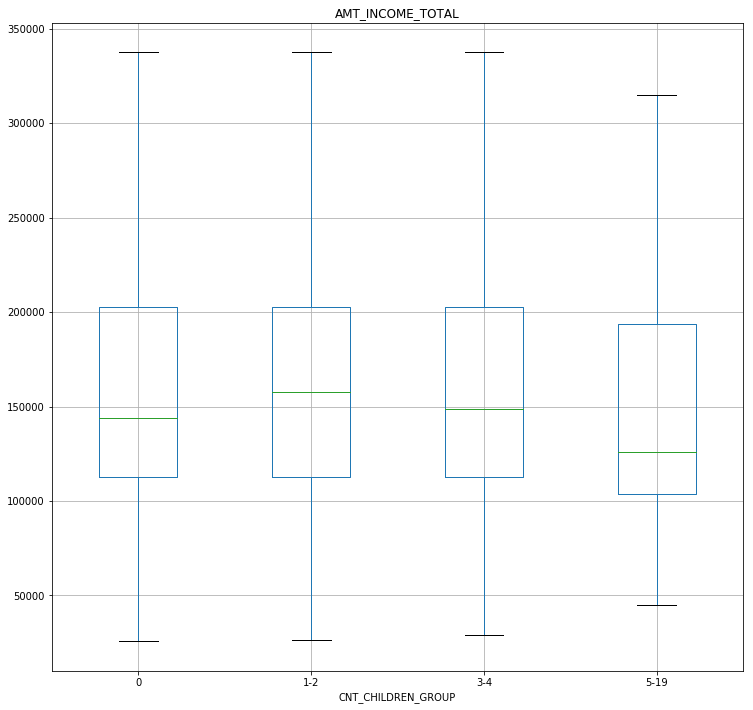

In [6]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = 'CNT_CHILDREN_GROUP'

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [7]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: x - x.mean() / x.std())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,202498.411765
1,270000.0,269998.411765
2,67500.0,67498.411765
3,135000.0,134998.411765
4,121500.0,121498.411765
